---
# **Importing Libraries**

---



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
from PIL import ImageEnhance
import random


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---
# **Original Test Image**

---



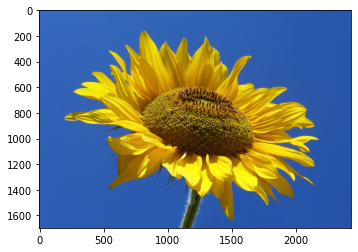

In [ ]:
image = Image.open('/content/drive/MyDrive/PROJECT/AE IMAGE ENHANCER/TEST.jpg')
plt.imshow(image)
plt.show()

---
# **Brightened**

---



<span style='color:Green'> **This class can be used to control the brightness of an image. An enhancement factor of 0.0 gives a black image. A factor of 1.0 gives the original image.**  </span>

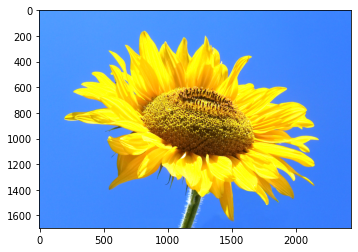

In [ ]:
enh_bri = ImageEnhance.Brightness(image)
brightness = 1.5
image_brightened = enh_bri.enhance(brightness)
# image_brightened.show()
plt.figure("brightened")
plt.imshow(image_brightened)
plt.show()
image_brightened.save('TESTBRIGHTENED.jpg')

---
# **Coloured**

---



<span style='color:Green'> **This class can be used to adjust the color balance of an image, in a manner similar to the controls on a color TV set. An enhancement factor of 0.0 gives a black and white image. A factor of 1.0 gives the original image.**  </span>

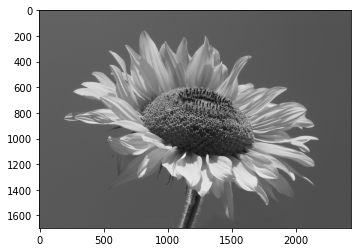

In [ ]:
enh_col = ImageEnhance.Color(image)
color = 0
image_colored = enh_col.enhance(color)
# image_colored.show()
plt.figure("colored")
plt.imshow(image_colored)
plt.show()
image_colored.save('TESTCOLOURED.jpg')

---
# **Contrasted**

---



<span style='color:Green'> **This class can be used to control the contrast of an image, similar to the contrast control on a TV set. An enhancement factor of 0.0 gives a solid grey image. A factor of 1.0 gives the original image.**  </span>

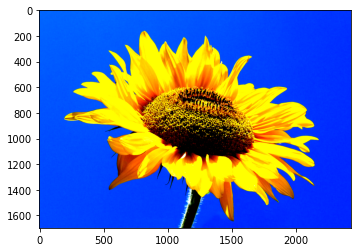

In [ ]:
enh_con = ImageEnhance.Contrast(image)
contrast = 3
image_contrasted = enh_con.enhance(contrast)
# image_contrasted.show()
plt.figure("contrast")
plt.imshow(image_contrasted)
plt.show()
image_contrasted.save('TESTCONTRASTED.jpg')

---
# **Sharpened**

---



<span style='color:Green'> **This class can be used to adjust the sharpness of an image. An enhancement factor of 0.0 gives a blurred image, a factor of 1.0 gives the original image, and a factor of 2.0 gives a sharpened image.**  </span>

---



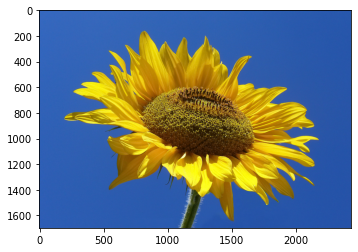

In [ ]:
enh_sha = ImageEnhance.Sharpness(image)
sharpness = 5
image_sharped = enh_sha.enhance(sharpness)
# image_sharped.show()
plt.figure("sharpness")
plt.imshow(image_sharped)
plt.show()
image_sharped.save('TESTSHARPENED.jpg')



---


# **Gamma Correction/Power Law Transformation**

---



<span style='color:Green'> **Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings**  </span>

---



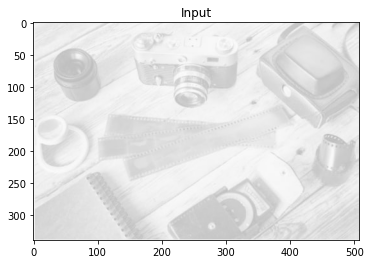

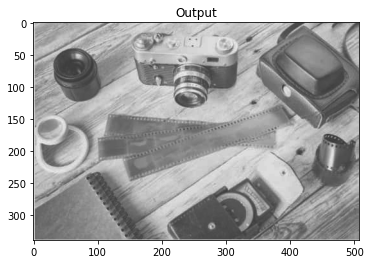

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PROJECT/AE COURSE PROJECT/GAMMA.jpg')
gamma = 5 
# Apply gamma correction.
gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
plt.title("Input")
plt.imshow(img)
plt.show()
plt.title("Output")
plt.imshow(gamma_corrected)
plt.show() 


---
# **Image Inverse**

---



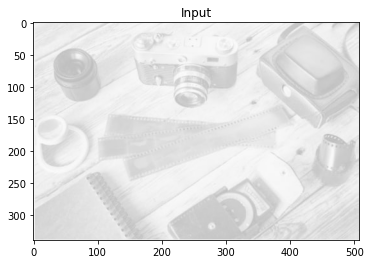

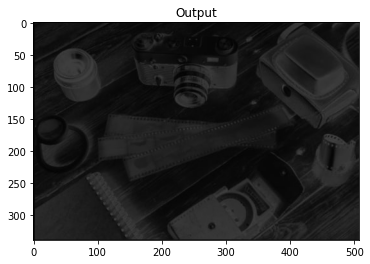

In [ ]:
im = Image.open('/content/drive/MyDrive/PROJECT/AE IMAGE ENHANCER/GAMMA.jpg')
im_invert = ImageOps.invert(im)
plt.title("Input")
plt.imshow(im)
plt.show()
plt.title("Output")
plt.imshow(im_invert)
plt.show()

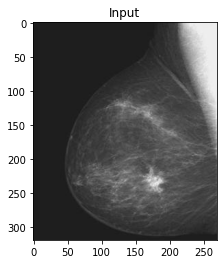

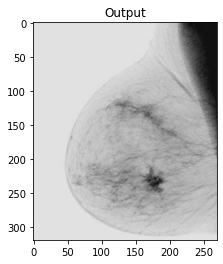

In [ ]:
im = Image.open('/content/drive/MyDrive/PROJECT/AE IMAGE ENHANCER/inv1.png')
im_invert = ImageOps.invert(im)
plt.title("Input")
plt.imshow(im)
plt.show()
plt.title("Output")
plt.imshow(im_invert)
plt.show()



---


# **Log transformation**


---





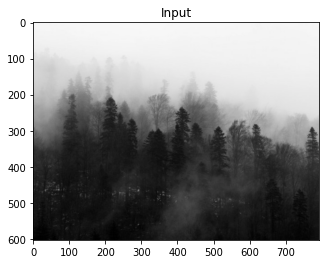

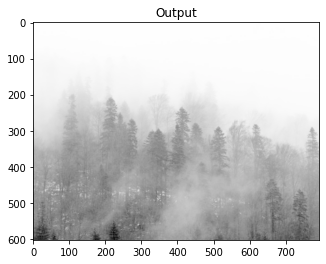

In [ ]:
image = cv2.imread('/content/drive/MyDrive/PROJECT/AE IMAGE ENHANCER/log.png')
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
log_image = np.array(log_image, dtype = np.uint8)
plt.show()
plt.title("Output")
plt.imshow(log_image)
plt.show()



---


# **Histogram Equalization**


---




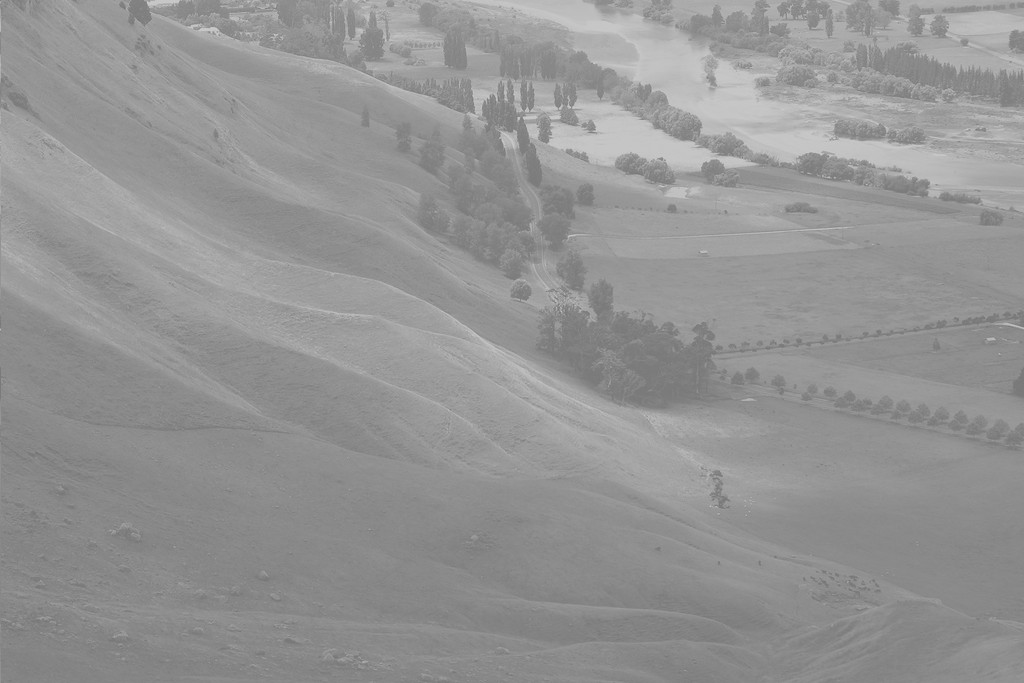

In [ ]:
hist_img = cv2.imread('/content/drive/MyDrive/PROJECT/AE COURSE PROJECT/Unequalized_Hawkes_Bay_NZ.jpg',0)
cv2_imshow(hist_img)


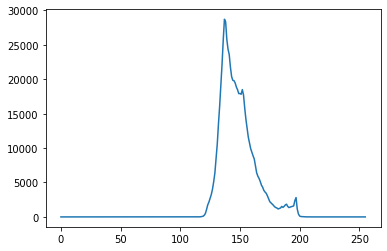

In [ ]:
histr = cv2.calcHist([hist_img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

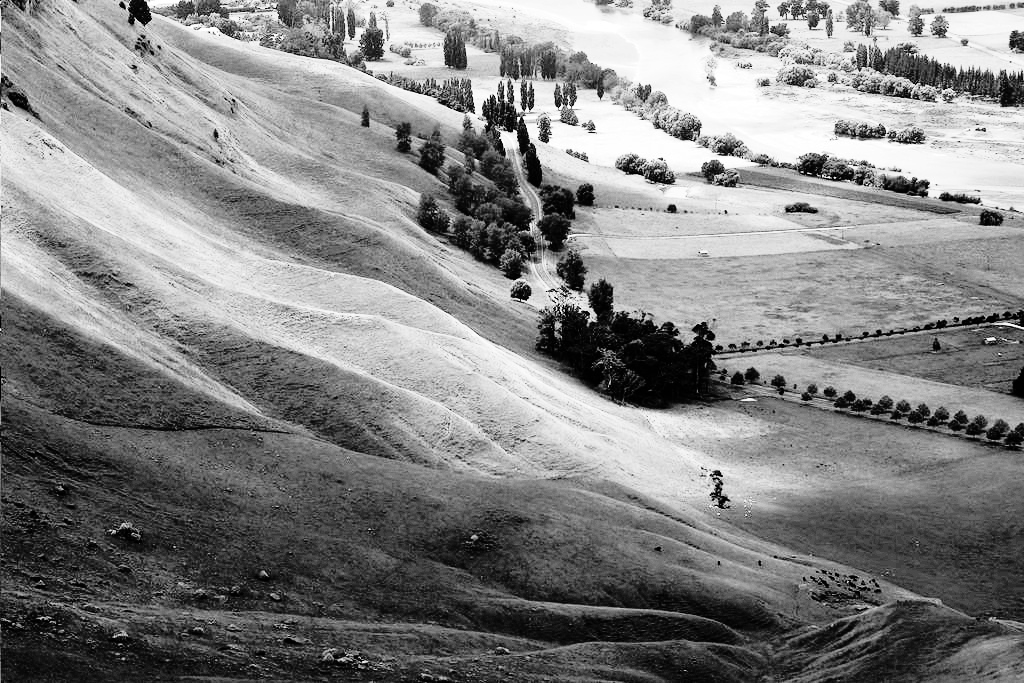

In [ ]:
equ = cv2.equalizeHist(hist_img)
cv2_imshow(equ)

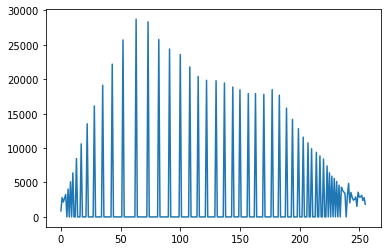

In [ ]:
histr_after = cv2.calcHist([equ],[0],None,[256],[0,256])
# show the plotting graph of an image
plt.plot(histr_after)
plt.show()

Text(0.5, 1.0, 'INPUT IMAGE')

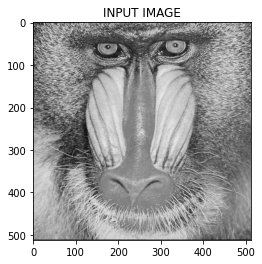

In [ ]:
op = cv2.imread('/content/drive/MyDrive/PROJECT/AE COURSE PROJECT/baboon.png',0)
op2 = cv2.cvtColor(op, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(op2, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
plt.title("INPUT IMAGE")

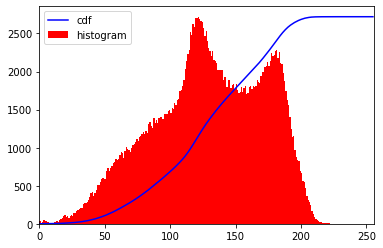

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

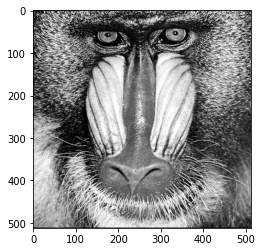

In [ ]:
result = cv2.equalizeHist(img)
plt.plot(result, color = 'b')
plt.imshow(result,cmap = "gray")



---


# **CLAHE**


---




Text(0.5, 1.0, 'INPUT IMAGE')

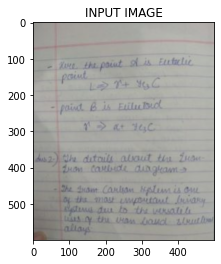

In [ ]:
# Reading the image from the present directory
image = cv2.imread("/content/drive/MyDrive/PROJECT/AE IMAGE ENHANCER/clahe2.jpg")
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Resizing the image for compatibility
image2 = cv2.resize(image2, (500, 600))
plt.imshow(image2)
plt.title("INPUT IMAGE")  

Text(0.5, 1.0, 'NORMAL THRESHOLDING')

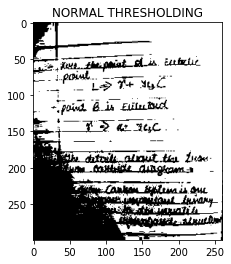

In [ ]:
# Ordinary thresholding the same image
_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
plt.imshow(ordinary_img,cmap="gray")
plt.title("NORMAL THRESHOLDING")

Text(0.5, 1.0, 'CLAHE')

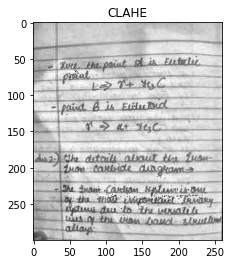

In [ ]:
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(image_bw) + 30
plt.imshow( final_img,cmap='gray')
plt.title("CLAHE")

---
# **SMOOTHING TECHNIQUES**
---

---

Averaging blurring
 
Gaussian blurring

Meadian blurring

---

In [ ]:
def getNoisyImage(type, image):
  noisy = np.zeros(image.shape, np.uint8)
  p = 0.25

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      r = random.random()
      if r < p/2:
        noisy[i][j] = [0, 0, 0]
      elif r < p:
        noisy[i][j] = [255, 255, 255]
      else:
        noisy[i][j] = image[i][j]
  return noisy

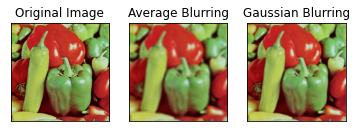

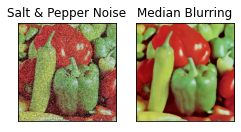

In [ ]:
img = cv2.cvtColor(cv2.imread('peppers_color.tif'), cv2.COLOR_BGR2RGB)

img_sp_noise = getNoisyImage("s&p", img)

img_avg = cv2.blur(img, (13, 13))
img_gaussian = cv2.GaussianBlur(img, (13, 13), sigmaX=2)
img_median = cv2.medianBlur(img_sp_noise, 13)

titles = ['Original Image', 'Average Blurring', 'Gaussian Blurring', 'Salt & Pepper Noise', 'Median Blurring', ]
images = [img,  img_avg, img_gaussian, img_sp_noise, img_median]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

for i in range(3,5):
    plt.subplot(1, 3, i-1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

---
# **BILATERAL FILTER**
---

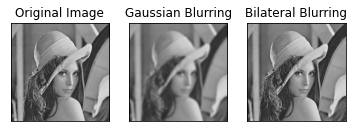

In [ ]:
img = cv2.imread('lena_gray.tif')

img_gaussian = cv2.GaussianBlur(img, (13, 13), sigmaX=2)
img_bilateral = cv2.bilateralFilter(img, 5, 13, 13)

titles = ['Original Image', 'Gaussian Blurring', 'Bilateral Blurring']
images = [img, img_gaussian, img_bilateral]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

---
# **THRESHOLDING**
---

---

# **SIMPLE THRESHOLDING**
THRESH_BINARY

THRESH_BINARY_INV

THRESH_TRUNC

THRESH_TOZERO

THRESH_TOZERO_INV

---

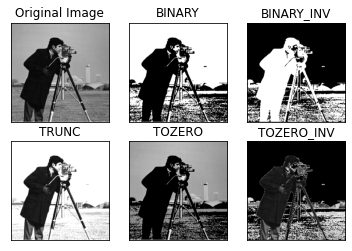

In [ ]:
img = cv2.imread("cameraman.png", 0)

ret,thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

---
# **ADAPTIVE THRESHOLDING**
---

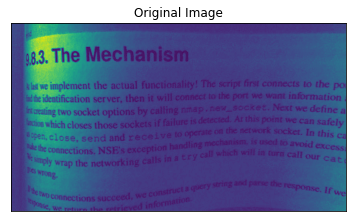

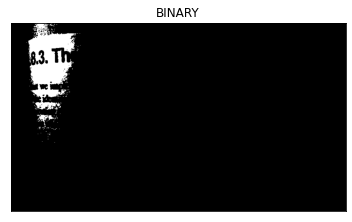

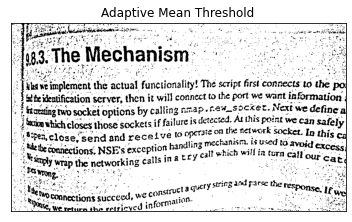

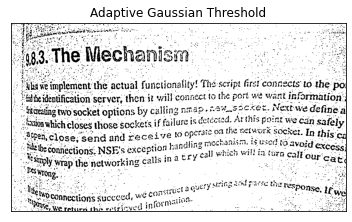

In [ ]:
img = cv2.imread('bookpage.jpg', 0)

ret, thresh1 = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 2)
thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)

plt.imshow(img)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_GRAY2RGB))
plt.title('BINARY')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2RGB))
plt.title("Adaptive Mean Threshold")
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(cv2.cvtColor(thresh3, cv2.COLOR_GRAY2RGB))
plt.title("Adaptive Gaussian Threshold")
plt.xticks([])
plt.yticks([])
plt.show()

---
# **OTSU'S BINARIZATION**
---

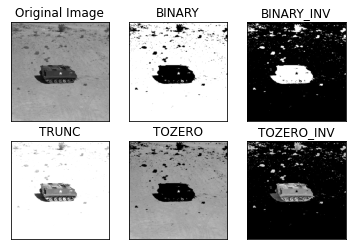

In [ ]:
img = cv2.imread("7.1.08.tiff", 0)

ret,thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret,thresh3 = cv2.threshold(img, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret,thresh4 = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
ret,thresh5 = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

---
# **MORPHOLOGICAL TRANSFORMATIONS**
---

---
## **EROSION AND DILATION**
---

In [ ]:
img = cv2.imread("billiard_balls.jpg", 0)
ret,thresh = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=2)

erosion = cv2.erode(thresh, kernel, iterations=3)

titles = ['Original Image','BINARY_INV', 'Dilation', 'Erosion']
images = [img, thresh1, dilation, erosion]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

---
## **OPENING || CLOSING**
---

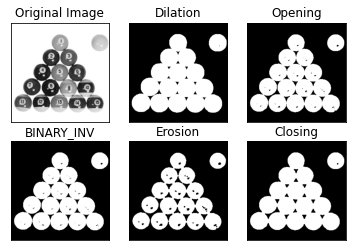

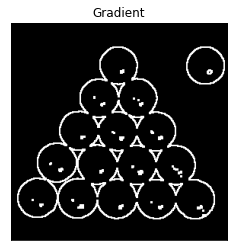

In [ ]:
dilation=cv2.dilate(thresh, kernel, iterations=1)
erosion=cv2.erode(thresh, kernel, iterations=1)
opening=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing=cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mg=cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

titles=["Original Image", "Dilation", "Opening", "BINARY_INV", "Erosion", "Closing", "Gradient"]
images=[img, dilation, opening, thresh, erosion, closing, mg]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.imshow(images[6], cmap='gray')
plt.title(titles[6])
plt.xticks([])
plt.yticks([])
plt.show()

---
# **LAPLACIAN AND SOBEL**
---

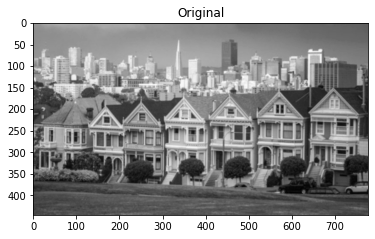

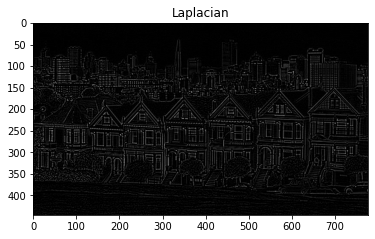

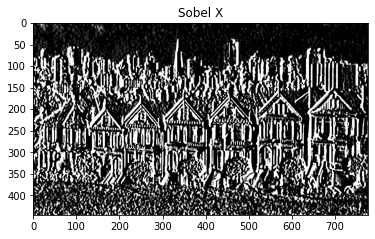

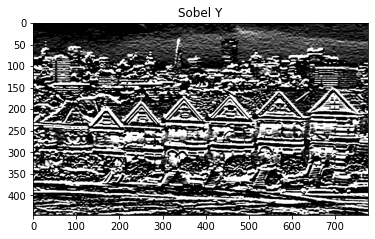

In [ ]:

#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread('/content/drive/MyDrive/PROJECT/AE IMAGE ENHANCER/sanfran.jpg')

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),10)

# convolute with proper kernels
laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)  # y

plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.show()
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.show()
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.show()
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.show()


---
# **GRADIENT**
---

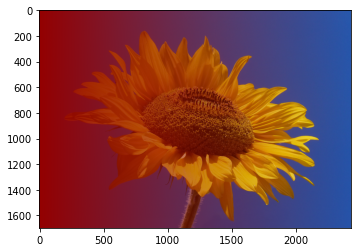

In [ ]:
input_im = Image.open('/content/drive/MyDrive/PROJECT/AE IMAGE ENHANCER/TEST.jpg')
if input_im.mode != 'RGBA':
  input_im = input_im.convert('RGBA')
width, height = input_im.size

    # create a gradient that
    # starts at full opacity * initial_value
    # decrements opacity by gradient * x / width
alpha_gradient = Image.new('L', (width, 1), color=0xFF)
for x in range(width):
  a = int((1 * 255.) * (1. - 1 * float(x)/width))
  if a > 0:
    alpha_gradient.putpixel((x, 0), a)
  else:
    alpha_gradient.putpixel((x, 0), 0)
        # print '{}, {:.2f}, {}'.format(x, float(x) / width, a)
alpha = alpha_gradient.resize(input_im.size)

    # create black image, apply gradient
black_im = Image.new('RGBA', (width, height), color=0x94)
black_im.putalpha(alpha)

    # make composite with original image
output_im = Image.alpha_composite(input_im, black_im)
plt.imshow(output_im)
plt.show()

